# Milestone 1

In [4]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Business Problem:
The real estate market has experienced significant growth over the past few years, driven by urban expansion and increasing demand for residential properties. Accurately predicting property prices is critical for real estate agencies, investors, and buyers. With a variety of factors influencing property value, from location and size to amenities and furnishing status, understanding the impact of each feature on price is complex yet essential for informed decision-making. Misvaluation can lead to poor investment decisions, resulting in financial losses for investors or excessive costs for buyers. Therefore, a model that can predict property prices based on specific features such as area, number of bedrooms, and amenities would be highly valuable for real estate agencies, developers, and individual buyers.

### Project Objective:
The primary goal of this project is to develop a model that can accurately predict property prices using various property features. The model will assist real estate professionals and investors by providing insights into how different property attributes impact pricing, thereby enabling better market positioning and decision-making. The target variable for this model is the property price, which will be predicted based on features like area, number of bedrooms and bathrooms, stories, amenities, and furnishing status.

### Data and Features:
The dataset includes various property features such as area (in square feet), number of bedrooms, bathrooms, and stories, along with amenities like air conditioning, parking availability, and furnishing status. These features will serve as inputs for our model, with the ultimate goal of predicting property prices based on these attributes.

- Data: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

## 1. Data Acquisition and Loading

In [8]:
# read a csv file and create a dataframe
df = pd.read_csv("data/housing.csv")

In [3]:
# Display the top 10 rows of a dataframe
print("First ten rows of the dataset:")
df.head(10)

First ten rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
# Display the bottom 5 rows of a dataframe
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
print("Dimensions of the data frame:", df.shape)

Dimensions of the data frame: (545, 13)


## 2. Data Visualization

### 1. Price Distribution

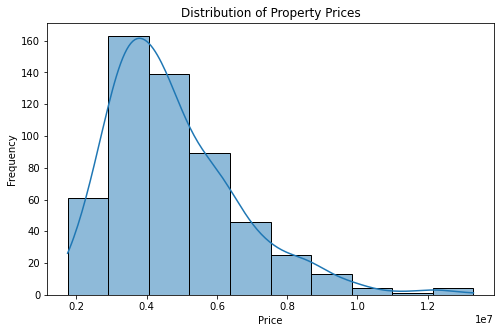

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 2. Area vs. Price

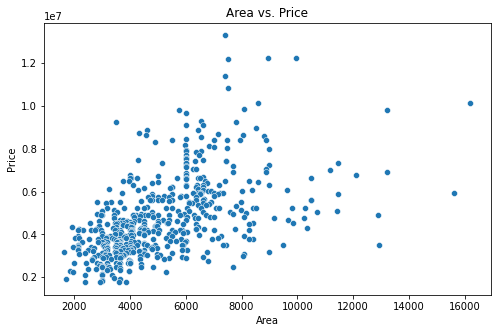

In [18]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


### 3. Price by Furnishing Status


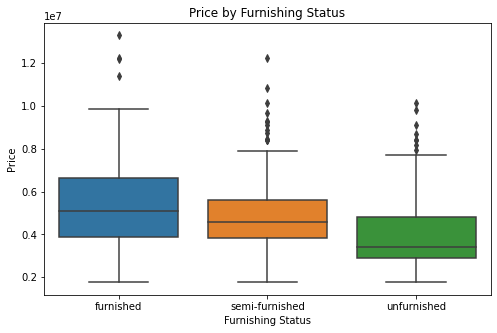

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

### 4. Count of Properties by Number of Bedrooms


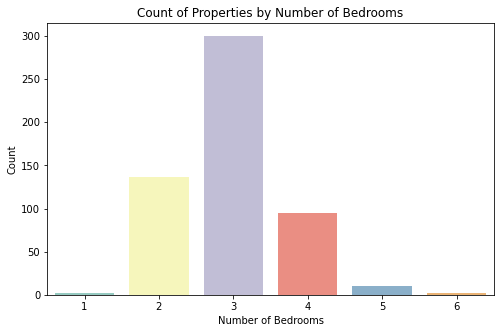

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=df, palette='Set3')
plt.title('Count of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

### 5. Bathroom Count Distribution

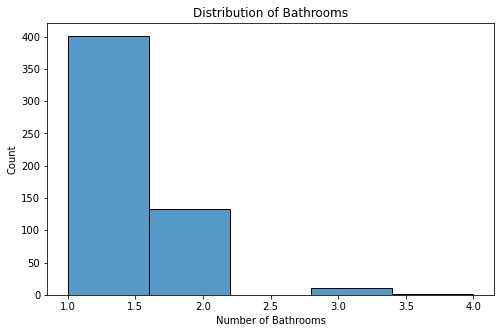

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bathrooms'], bins=5, kde=False)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

### 6. Air Conditioning Impact on Price

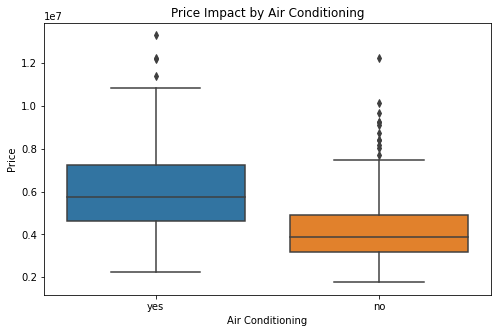

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price Impact by Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Price')
plt.show()

### 7. Parking Spaces vs. Price

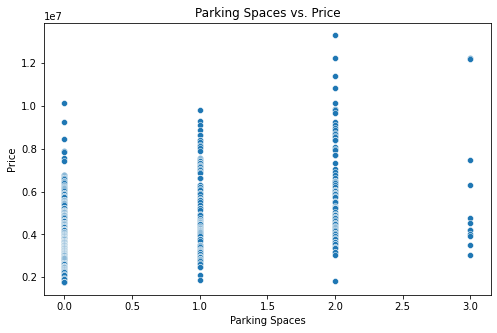

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='parking', y='price', data=df)
plt.title('Parking Spaces vs. Price')
plt.xlabel('Parking Spaces')
plt.ylabel('Price')
plt.show()

## Graph Analysis :

- <b>Distribution of Property Prices:</b> A histogram of property prices shows the overall distribution, revealing the range and concentration of property prices.
    - The distribution is right-skewed, with a longer tail on the right. This suggests that while most properties fall within the lower to mid-price range, there are some properties with significantly higher prices, which are less common.
    - As the price increases, the frequency of properties decreases. This indicates that high-priced properties are rarer compared to mid- and lower-priced properties.

- <b>Area vs. Price:</b> A scatter plot displaying the relationship between property area and price helps determine if larger areas command higher prices, highlighting the impact of property size.
    - There is a general upward trend, indicating a positive correlation between area and price. As the property area increases, the price tends to increase as well. This suggests that larger properties are generally more expensive.
    - Most data points are clustered between 2000 to 8000 square feet for area and between 2 million to 8 million for price. This cluster shows that the majority of properties are of medium size and price.

- <b>Price by Furnishing Status:</b> A box plot illustrating the price distribution across furnishing statuses (furnished, semi-furnished, unfurnished) indicates how much furnishing affects property value.
    - Furnished properties are generally priced higher, suggesting buyers value fully furnished homes.
    - Unfurnished properties are priced lower, suggesting buyers are not paying higher for unfurnished homes.
    
- <b>Count of Properties by Number of Bedrooms:</b> This bar plot reveals the most common number of bedrooms in the dataset, helping identify which configurations are most popular in the market.
    - Properties with 3 bedrooms are more common, indicating high demand for multi-bedroom homes.
    
- <b>Bathroom Count Distribution:</b> A histogram showing the distribution of bathrooms offers insights into standard bathroom configurations for properties in the dataset.
    - Most properties have 1 or 2 bathrooms, reflecting market demand.
    
- <b>Air Conditioning Impact on Price:</b> A box plot showing the distribution of prices based on whether the property has air conditioning helps analyze if air conditioning significantly impacts pricing.
    - Properties with air conditioning tend to be more expensive, implying a premium on comfort features.
    
- <b>Parking Spaces vs. Price:</b> A scatter plot that explores the relationship between parking spaces and price helps determine if properties with more parking spaces are generally priced higher.
    - 2 parking spaces seem to correspond with higher property prices, highlighting convenience.

## Conclusion :

- The preliminary analysis suggests that property area and furnishing status are significant influencers of price.
- There is a clear preference for properties with two or three bathrooms. 
- These insights will guide the model-building process, where a regression model will be developed to predict property prices based on these and other features. 
- Understanding these factors can help stakeholders in the real estate market make data-driven decisions and optimize property pricing strategies.

In conclusion, property area, furnishing status, and amenities like air conditioning and parking are significant price determinants. This analysis will guide the model development for accurately predicting property prices based on these key features.

# Milestone 2

In [6]:
# Display the top 10 rows of a dataframe
print("First ten rows of the dataset:")
df.head(10)

First ten rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### 1. Drop any features that are not useful for your model building and explain why they are not useful.

In [7]:
# 'mainroad' and 'guestroom' are dropped 
df.drop(columns=['mainroad', 
                 'guestroom'], 
        inplace=True)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished


##### Dropped columns 'mainroad' and 'guestroom' based on the domain knowledge.
##### These features are good to have , not must to have while buying the house hence they are not useful and not much impactful for model development. 

### 2. Perform any data extraction/selection steps.

In [9]:
# Display descriptive statistics for the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [10]:
# Select relevant features
selected_features = [
    'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'basement', 
    'airconditioning', 'parking', 'furnishingstatus', 'prefarea'
]

In [11]:
df = df[selected_features]

In [12]:
# Filter rows based on logical criteria
# Remove properties with extreme area values
df = df[(df['area'] >= 500) & (df['area'] <= 20000)]  

In [13]:
# Filter rows based on logical criteria
# Remove rows with 0 bedrooms and 0 bathrooms
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)] 

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus,prefarea
0,13300000,7420,4,2,3,no,yes,2,furnished,yes
1,12250000,8960,4,4,4,no,yes,3,furnished,no
2,12250000,9960,3,2,2,yes,no,2,semi-furnished,yes
3,12215000,7500,4,2,2,yes,yes,3,furnished,yes
4,11410000,7420,4,1,2,yes,yes,2,furnished,no


##### Some features may be irrelevant to the model, while others are key predictors for 'price'.  

##### Selected features that are essential for predicting housing prices as these features are directly related to the structure and amenities of a house, which are key factors for price prediction.

### 3. Transform features if necessary.

In [15]:
# Log-transform 'price' to reduce skewness
df['price'] = np.log(df['price'])

In [16]:
# Scale numerical features
scaler = StandardScaler()
df[['price', 'area']] = scaler.fit_transform(df[['price', 'area']])

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus,prefarea
0,2.948408,1.046726,4,2,3,no,yes,2,furnished,yes
1,2.727233,1.757010,4,4,4,no,yes,3,furnished,no
2,2.727233,2.218232,3,2,2,yes,no,2,semi-furnished,yes
3,2.719538,1.083624,4,2,2,yes,yes,3,furnished,yes
4,2.536186,1.046726,4,1,2,yes,yes,2,furnished,no


##### 'price' variable has a skewed distribution, hence applied a log transformation can make it more normally distributed, which can improve model performance.

##### House prices and areas vary widely hence performed scaling using StandardScaler method as it's beneficial to scale these features .

##### In summary, Feature scaling ensures all features are on the same scale, preventing the model from giving more importance to higher magnitude values like 'price' and 'area'.

### 4. Engineer new useful features.

In [18]:
# Feature Creation : price_per_sqft
df['price_per_sqft'] = df['price'] / df['area']

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus,prefarea,price_per_sqft
0,2.948408,1.046726,4,2,3,no,yes,2,furnished,yes,2.816790
1,2.727233,1.757010,4,4,4,no,yes,3,furnished,no,1.552202
2,2.727233,2.218232,3,2,2,yes,no,2,semi-furnished,yes,1.229462
3,2.719538,1.083624,4,2,2,yes,yes,3,furnished,yes,2.509669
4,2.536186,1.046726,4,1,2,yes,yes,2,furnished,no,2.422970


##### Created a new feature 'price_per_sqft' by dividing 'price' by 'area'.
##### It can help the model focus on the relative cost of properties based on size, which is often a key factor in housing price prediction.

### 5. Deal with missing data (do not just drop rows or columns without justifying this).

In [20]:
# Impute missing values for 'parking' column with median
imputer = SimpleImputer(strategy='median')
df['parking'] = imputer.fit_transform(df[['parking']])

##### Dropping rows/columns can remove valuable information, hence performed median imputation that allows to preserve data and maintain sample size without introducing bias.

In [21]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
prefarea            0
price_per_sqft      0
dtype: int64

##### No missing values present in the data

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,furnishingstatus,prefarea,price_per_sqft
0,2.948408,1.046726,4,2,3,no,yes,2.0,furnished,yes,2.816790
1,2.727233,1.757010,4,4,4,no,yes,3.0,furnished,no,1.552202
2,2.727233,2.218232,3,2,2,yes,no,2.0,semi-furnished,yes,1.229462
3,2.719538,1.083624,4,2,2,yes,yes,3.0,furnished,yes,2.509669
4,2.536186,1.046726,4,1,2,yes,yes,2.0,furnished,no,2.422970


### 6. Create dummy variables if necessary.

In [23]:
# One-hot encode categorical variables
df = pd.get_dummies(df, 
                    columns=['basement', 'airconditioning', 'prefarea', 'furnishingstatus',
                            'bedrooms', 'bathrooms', 'stories', 'parking'], 
                    drop_first=True
                   )

In [24]:
df.head()

,price,area,price_per_sqft,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1.0,parking_2.0,parking_3.0
0,2.948408,1.046726,2.816790,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2.727233,1.757010,1.552202,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2.727233,2.218232,1.229462,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,2.719538,1.083624,2.509669,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.536186,1.046726,2.422970,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


##### Converted categorical variables into dummy variables to ensure they are represented numerically without implying any inherent ordering or value
##### Handled dummy variable trap by removing the first column post one hot encoding

### 7. Drop Duplicates.

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(545, 22)

##### Duplicates can bias the model by introducing repetitive patterns.
##### Checked and dropped duplicates if any are found.

### Dataframe - After the data preparation steps

In [27]:
df.head(10)

,price,area,price_per_sqft,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1.0,parking_2.0,parking_3.0
0,2.948408,1.046726,2.816790,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2.727233,1.757010,1.552202,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2.727233,2.218232,1.229462,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,2.719538,1.083624,2.509669,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.536186,1.046726,2.422970,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,2.400840,1.083624,2.215565,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,2.221477,1.581745,1.404447,0,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
7,2.221477,5.096263,0.435903,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
8,2.146242,1.360358,1.577704,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,2.127100,0.276484,7.693392,0,1,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0


In [28]:
df.tail(10)

,price,area,price_per_sqft,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1.0,parking_2.0,parking_3.0
535,-2.015846,-0.825839,2.440968,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
536,-2.201398,-0.798165,2.758074,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
537,-2.299207,-1.591469,1.444708,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
538,-2.299207,-0.692545,3.319938,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
539,-2.349479,-0.996491,2.357752,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
540,-2.400708,-0.991879,2.420364,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
541,-2.479962,-1.268613,1.954861,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
542,-2.506190,-0.705921,3.550243,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
543,-2.506190,-1.033389,2.425215,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
544,-2.506190,-0.599839,4.178102,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


### Store dataframe as a csv file

In [29]:
df.to_csv("data/preprocessed_data.csv", index=None)

# Milestone 3

In [3]:
# read a preprocessed csv file from milestone 2 and create a dataframe
df = pd.read_csv("data/preprocessed_data.csv")

In [14]:
# Display the top 10 rows of a dataframe
print("First ten rows of the pre-processed dataset:")
df.head(10)

First ten rows of the pre-processed dataset:


,price,area,price_per_sqft,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1.0,parking_2.0,parking_3.0
0,2.948408,1.046726,2.816790,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2.727233,1.757010,1.552202,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2.727233,2.218232,1.229462,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,2.719538,1.083624,2.509669,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.536186,1.046726,2.422970,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,2.400840,1.083624,2.215565,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,2.221477,1.581745,1.404447,0,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
7,2.221477,5.096263,0.435903,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
8,2.146242,1.360358,1.577704,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,2.127100,0.276484,7.693392,0,1,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0


In [15]:
# Display the bottom 5 rows of a preprocessed dataframe
df.tail()

,price,area,price_per_sqft,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms_2,bedrooms_3,...,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1.0,parking_2.0,parking_3.0
540,-2.400708,-0.991879,2.420364,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
541,-2.479962,-1.268613,1.954861,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
542,-2.506190,-0.705921,3.550243,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
543,-2.506190,-1.033389,2.425215,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
544,-2.506190,-0.599839,4.178102,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [16]:
print("Dimensions of the preprocessed data frame:", df.shape)

Dimensions of the preprocessed data frame: (545, 22)


### Split Data Set

#### Split the data into training (75%) and test (25%) sets to ensure we can evaluate the model's performance on unseen data.

In [7]:
# Split into features and target variable
# price is the target feature , storing it in variable 'y'
X = df.drop('price', axis=1)
y = df['price']

In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42
                                                   )

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((408, 21), (137, 21), (408,), (137,))

### i. Linear Regression

#### A good baseline model for regression problems, which assumes a linear relationship between features and target.

In [65]:
linear_reg_model = LinearRegression()

In [66]:
# Train the model
linear_reg_model.fit(X_train, 
                     y_train)

LinearRegression()

In [67]:
# Predict on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)

In [68]:
# Calculate evaluation metrics
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

In [69]:
print(f"Linear Regression - MAE: {mae_linear_reg:.3f}, MSE: {mse_linear_reg:.3f}, R-squared: {r2_linear_reg:.3f}")


Linear Regression - MAE: 0.532, MSE: 0.466, R-squared: 0.655


In [70]:
evaluation_results = {}

In [71]:
# Store results
evaluation_results["Linear Regression"] = {
    "MAE": mae_linear_reg,
    "MSE": mse_linear_reg,
    "R-squared": r2_linear_reg
}

### ii. Random Forest Regression

#### Useful for capturing non-linear relationships and interactions between features.

In [73]:
rf_model = RandomForestRegressor(random_state=42)

In [74]:
# Train the model
rf_model.fit(X_train, 
            y_train)

RandomForestRegressor(random_state=42)

In [75]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [76]:
# Calculate evaluation metrics
mae_rf= mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [77]:
print(f"Random Forest - MAE: {mae_rf:.3f}, MSE: {mse_rf:.3f}, R-squared: {r2_rf:.3f}")

Random Forest - MAE: 0.186, MSE: 0.092, R-squared: 0.932


In [79]:
# Store results
evaluation_results["Random Forest"] = {
    "MAE": mae_rf,
    "MSE": mse_rf,
    "R-squared": r2_rf
}
  

### iii. Support Vector Machine Regression

#### It is a powerful model for regression tasks that can capture complex, non-linear relationships.

In [87]:
svr_model = SVR(kernel='rbf', 
               )

In [88]:
# Train the model
svr_model.fit(X_train, 
            y_train)

SVR()

In [89]:
# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

In [90]:
# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [91]:
print(f"Support Vector Machine Regression - MAE: {mae_svr:.3f}, MSE: {mse_svr:.3f}, R-squared: {r2_svr:.3f}")

Support Vector Machine Regression - MAE: 0.957, MSE: 1.343, R-squared: 0.007


In [92]:
# Store results
evaluation_results["Support Vector Machine"] = {
    "MAE": mae_svr,
    "MSE": mse_svr,
    "R-squared": r2_svr
}

### iv. Gradient Boosting Regression

#### It can handle non-linear relationships well, often yielding high accuracy but at the cost of interpretability.

In [80]:
gb_model = GradientBoostingRegressor(random_state=42)

In [81]:
# Train the model
gb_model.fit(X_train, 
            y_train)

GradientBoostingRegressor(random_state=42)

In [82]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

In [83]:
# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [84]:
print(f"Gradient Boosting - MAE: {mae_gb:.3f}, MSE: {mse_gb:.3f}, R-squared: {r2_gb:.3f}")

Gradient Boosting - MAE: 0.250, MSE: 0.143, R-squared: 0.895


In [86]:
# Store results
evaluation_results["Gradient Boosting"] = {
    "MAE": mae_gb,
    "MSE": mse_gb,
    "R-squared": r2_gb
}

### Evaluation Metrics
- Mean Absolute Error (MAE): Measures the average magnitude of errors, making it easy to interpret as it is in the same units as the target.
- Mean Squared Error (MSE): Penalizes larger errors more than smaller errors, which can be useful if outliers are present.
- R-Squared: Indicates the proportion of variance explained by the model, providing a general sense of model performance.


In [93]:
# Display all model results
evaluation_results_df = pd.DataFrame(evaluation_results).T
print("\nModel Comparison:\n", evaluation_results_df)


Model Comparison:
                              MAE       MSE  R-squared
Linear Regression       0.531932  0.466289   0.655366
Random Forest           0.186042  0.091920   0.932062
Gradient Boosting       0.250430  0.142663   0.894558
Support Vector Machine  0.956657  1.343242   0.007211


### Conclusion

Based on the results:

- Random Forest appears to be the most suitable model, as it consistently achieved the highest accuracy and lowest error metrics. It is capable of handling non-linearities and interactions within the dataset, which seem essential given its strong performance.
- Gradient Boosting is a close second, providing competitive performance with the potential for further improvement with fine-tuning.
- Linear Regression may still be useful for a simpler baseline model but lacks the flexibility of Random Forest and Gradient Boosting.
- Support Vector Machine was the least effective model and may not be suitable for this task without extensive tuning or transformation of the data.

#### Overall Random Forest Model provides the best balance of interpretability and predictive accuracy for this data.